In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np

#function to read the the dataset , fill the missing values with mean method and crop it to columns on which we have to work on , the other columns are code snippets
def read_data(file_name):
    df = pd.read_excel(file_name)
    #to calculate the mean of all numeric columns in the dataFrame, ignoring the non-numeric data.
    df = df.fillna(df.mean(numeric_only=True))
    df = df.iloc[:, 4:10]
    return df

df = read_data('dataset.xlsx')

print(df.head())


   Header_and_Main_Declaration  Incomprehensible_Code  \
0                            2                    2.0   
1                            2                    2.0   
2                            2                    2.0   
3                            2                    1.0   
4                            2                    2.0   

   Comprehensible_Code_with_logical_errors  \
0                                        2   
1                                        2   
2                                        1   
3                                        1   
4                                        1   

   Comprehensible_code_with_syntax_errors  Correct_code_and_output  \
0                                     2.0                        2   
1                                     2.0                        0   
2                                     1.0                        1   
3                                     1.0                        0   
4                             

ans1)

In [3]:
#this is a utility function which helps us to split dataset into testing and traing data , different combinations are tried , whichever gives best output , we have that split of data
from sklearn.model_selection import train_test_split
#this imports the LinearRegression class from the sklearn.linear_model module, used for fitting linear models.
from sklearn.linear_model import LinearRegression

#function to perform the split of training and testing data , it takes the data that has to be split as parameters,the test_size parameter in train_test_split specifies the proportion of the dataset to include in the test set.
def trainTestSplit(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

#function to train the model , taking training data as parameters
def modelTrain(X_train, y_train):
    #.fit() method is used to train the model , it takes the training data as input
    reg = LinearRegression().fit(X_train, y_train)
    #.perdict() method to predictions based on trained model , it takes the data for which the prediction has to be made as a parameter
    y_train_pred = reg.predict(X_train)
    return reg

#passing out data for train_test split
X_train, X_test, y_train, y_test = trainTestSplit(df[['Correct_code_and_output']], df['Final_Marks'])

model = modelTrain(X_train, y_train)
model

LinearRegression()

ans2)

In [4]:
#these are the various function used the evaluate our model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Function to evaluate the model's performance , it takes the actual and predicted values as input
def modelEvaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    #.sqrt() is square root , math function present in numpy
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

#predicting values for training data
y_train_pred = model.predict(X_train)
#predicting values for testing data
y_test_pred = model.predict(X_test)

#evaluating the model
train_mse, train_rmse, train_mape, train_r2 = modelEvaluate(y_train, y_train_pred)
test_mse, test_rmse, test_mape, test_r2 = modelEvaluate(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, MAPE: {train_mape:.2%}, R²: {train_r2:.2f}")
print("\nTesting Set Metrics:")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, MAPE: {test_mape:.2%}, R²: {test_r2:.2f}")


Training Set Metrics:
MSE: 2.64, RMSE: 1.63, MAPE: 11096952697985274.00%, R²: 0.43

Testing Set Metrics:
MSE: 2.74, RMSE: 1.65, MAPE: 17679890739162960.00%, R²: 0.36


In [5]:
df = read_data('dataset.xlsx')

ans3)

In [6]:
#This selects the last column of the DataFrame df and assigns it to y.
y = df.iloc[:,-1]
#dropping final marks column
X = df.drop('Final_Marks',axis = 1)
#splitting the data
X_train, X_test, y_train, y_test = trainTestSplit(X, y)

# Train the model
model = modelTrain(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#evaluating our model
train_mse, train_rmse, train_mape, train_r2 = modelEvaluate(y_train, y_train_pred)
test_mse, test_rmse, test_mape, test_r2 = modelEvaluate(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, MAPE: {train_mape:.2%}, R²: {train_r2:.2f}")
print("\nTesting Set Metrics:")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, MAPE: {test_mape:.2%}, R²: {test_r2:.2f}")


Training Set Metrics:
MSE: 0.00, RMSE: 0.06, MAPE: 935317922098.07%, R²: 1.00

Testing Set Metrics:
MSE: 0.00, RMSE: 0.00, MAPE: 1490167536901.79%, R²: 1.00


ans4)

In [7]:
#This imports the KMeans class from sklearn.cluster, used for performing K-means clustering.
from sklearn.cluster import KMeans

# function to drop a given column in a dataframe
def prepare_data(df, target_column):
    X = df.drop(columns=[target_column])
    return X

# function to perform kMeansClustering , it takes the data and number of clusters as input
def process(X, n_clusters=3):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(X)
    return model

#This function addLabels adds a new column 'Cluster' to the DataFrame df
def addLabels(df, kmeans):
  #.labels_ is an attribute of a fitted clustering model to store the cluster labels
    df['Cluster'] = kmeans.labels_
    return df

#main function , we preProcess the data , perform the clustering and add labels , if number of clusters is not mentioned , we do it for 3
def main(df, target_column, n_clusters=3):
    X = prepare_data(df, target_column)
    kmeans = process(X, n_clusters)
    updatedDf = addLabels(df, kmeans)
    return updatedDf, kmeans

updatedDf, kmeansModel = main(df, target_column='Final_Marks', n_clusters=2)

print(updatedDf.head())
print("Cluster Centers:\n", kmeansModel.cluster_centers_)

   Header_and_Main_Declaration  Incomprehensible_Code  \
0                            2                    2.0   
1                            2                    2.0   
2                            2                    2.0   
3                            2                    1.0   
4                            2                    2.0   

   Comprehensible_Code_with_logical_errors  \
0                                        2   
1                                        2   
2                                        1   
3                                        1   
4                                        1   

   Comprehensible_code_with_syntax_errors  Correct_code_and_output  \
0                                     2.0                        2   
1                                     2.0                        0   
2                                     1.0                        1   
3                                     1.0                        0   
4                             

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ans5)

In [12]:
#various functions to evaluate the validity of our clusters
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#make a Kmeans model with 2 clusters and train it using .fit() method
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)

#all 3 function takes the training data and labels as parameters
silhouette = silhouette_score(X_train, kmeans.labels_)
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
db_score = davies_bouldin_score(X_train, kmeans.labels_)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Score:", db_score)


Silhouette Score: 0.28634883957844187
Calinski-Harabasz Score: 352.2742594991912
Davies-Bouldin Score: 1.5252685856083787


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


ans6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

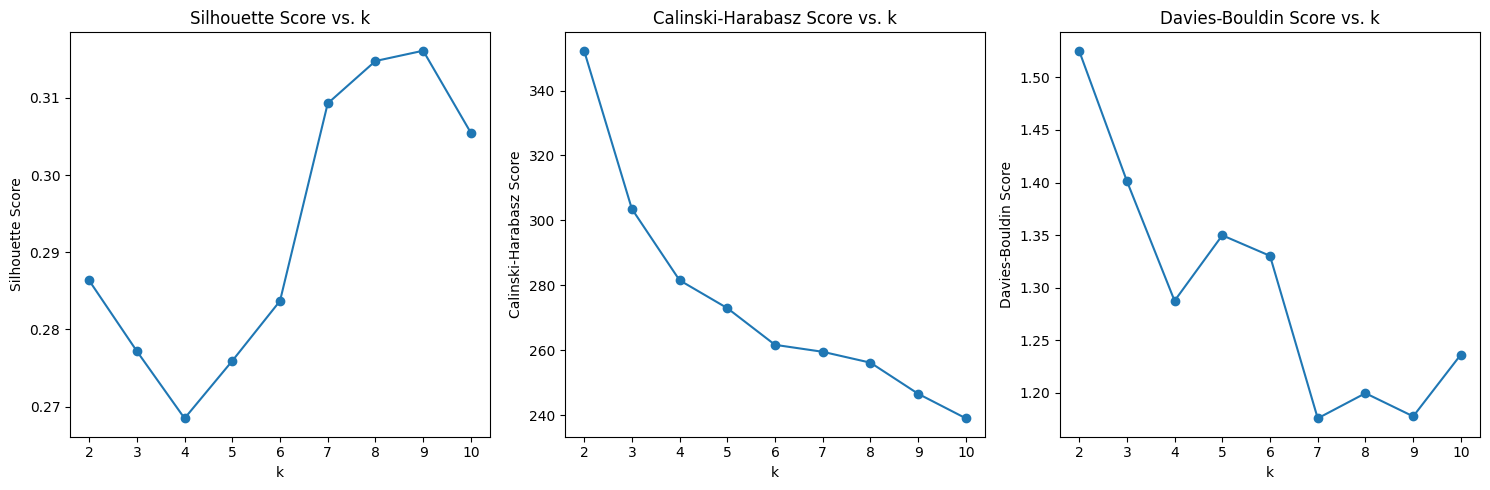

In [13]:
import matplotlib.pyplot as plt

#function to evaluate the clustering model , it takes training data and different values of k as parameters , finds the 3 scores for each k
#function trains the model , generates labels and pass them to previously used functions to get the evaluation scores
def evaluate(X, k_values):
    silhouette_scores = []
    ch_scores = []
    db_scores = []

    for k in k_values:
      #making the model and traing it
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))
        ch_scores.append(calinski_harabasz_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))

    return silhouette_scores, ch_scores, db_scores

def plot_scores(k_values, silhouette_scores, ch_scores, db_scores):
    plt.figure(figsize=(15, 5))
    #This creates a subplot in a figure with 1 row and 3 columns, positioning the current plot in the first subplot.
    plt.subplot(1, 3, 1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. k')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')

    plt.subplot(1, 3, 2)
    plt.plot(k_values, ch_scores, marker='o')
    plt.title('Calinski-Harabasz Score vs. k')
    plt.xlabel('k')
    plt.ylabel('Calinski-Harabasz Score')

    plt.subplot(1, 3, 3)
    plt.plot(k_values, db_scores, marker='o')
    plt.title('Davies-Bouldin Score vs. k')
    plt.xlabel('k')
    plt.ylabel('Davies-Bouldin Score')

    plt.tight_layout()
    plt.show()

# we evaluate out model for k values ranging from 2 to 10
k_values = range(2, 11)

# Evaluate K-means clustering for each k
#we'll have 3 lists of scores which are to be plotted
silhouette_scores, ch_scores, db_scores = evaluate(X_train, k_values)

# Plot the scores against k
plot_scores(k_values, silhouette_scores, ch_scores, db_scores)


ans7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

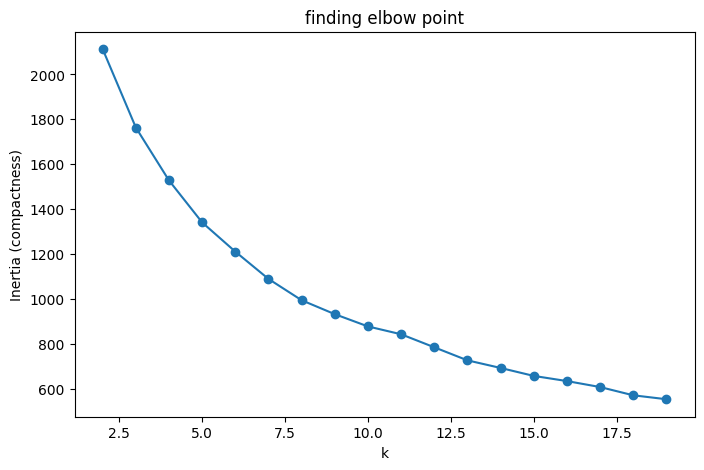

In [14]:
compactnessArray = []

#values of k from 2 to 19 to find the elbow point
kValues = range(2, 20)

# Calculate compactnessArray
#kmeans.inertia_ represents the sum of squared distances between each data point and its assigned cluster center, indicating the compactness of the clusters.
#we iterate through the values of k , define the model for that value of k , train it using .fit() method and append the compactness to the array
for k in kValues:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    compactnessArray.append(kmeans.inertia_)

# Plot the compactnessArray to find the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(kValues, compactnessArray, marker='o')
plt.title('finding elbow point')
plt.xlabel('k')
plt.ylabel('Inertia (compactness)')
plt.show()
